# Apprentissage supervisé - Regression, Decision Tree Regressor, Random Forest Regressor

Jérémy Le Joncour

## 1.  Préparation des données

### 1.1  Téléchargement de données

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import matplotlib.image as mpimg

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
import seaborn as sb

In [6]:
data = pd.read_csv("housing.csv")

### 1.2 Information sur les données

In [7]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Au vue des données présentes dans ce Dataset, nous pouvons traiter un problème de régression.

In [90]:
data.shape

(20640, 10)

#### Affichage des attributs

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


La *feature* "total_bedrooms" présente un manque de données (20433 contre 20640), un traitement devra donc être fait.

In [9]:
qualitatives_columns = list(data.describe(include=['object']))
qualitatives_columns

['ocean_proximity']

In [10]:
data[qualitatives_columns]

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


#### Occurrence des valeurs utilisées dans 'ocean_proximity'

In [11]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### Résumé Statistique des attributs

In [12]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Histogramme des attributs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E258E73A90>,
      dtype=object)

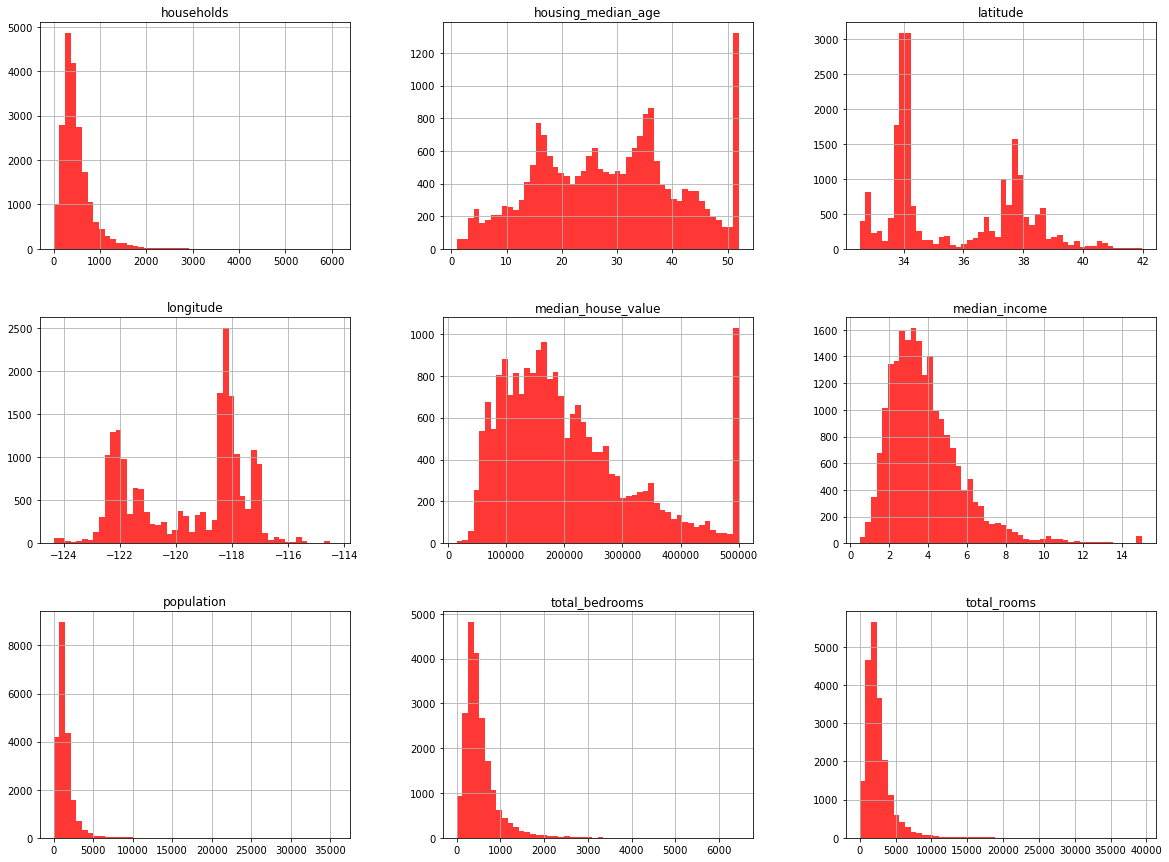

In [13]:
data.hist(bins = 50, figsize=(20,15), color='#ff3835')

### 1.3  Répartition des données

#### Fractionnement le jeu de données en jeu d'entraînement et jeu de test (20% pour le test)

In [14]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [15]:
x = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']]

In [16]:
y = data['median_house_value']

In [17]:
from sklearn.model_selection import train_test_split
x_app, x_test, y_app, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_app.shape, x_test.shape

((16512, 9), (4128, 9))

#### En-tête de x_test

In [18]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,NEAR OCEAN
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,<1H OCEAN
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,INLAND
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,INLAND
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,NEAR BAY


### 1.4 Découverte et visualisation des données

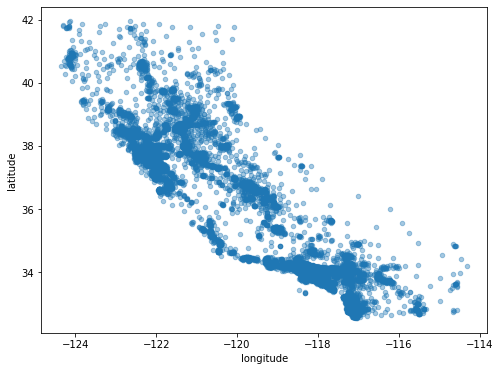

In [19]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(8,6))
plt.show()

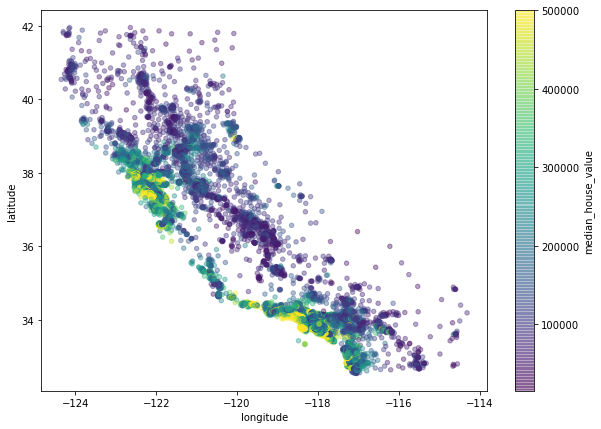

In [20]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    c="median_house_value", cmap='viridis', #Couleur en fonction de Median_House_Value
    colorbar=True, figsize=(10,7), sharex=False)
plt.show()

In [21]:
print('Longitude Maximale : {}' .format(data['longitude'].max()))
print('Longitude Minimale : {}' .format(data['longitude'].min()))
print('Latitude Maximale : {}' .format(data['latitude'].max()))
print('Latitude Minimale : {}' .format(data['latitude'].min()))

Longitude Maximale : -114.31
Longitude Minimale : -124.35
Latitude Maximale : 41.95
Latitude Minimale : 32.54


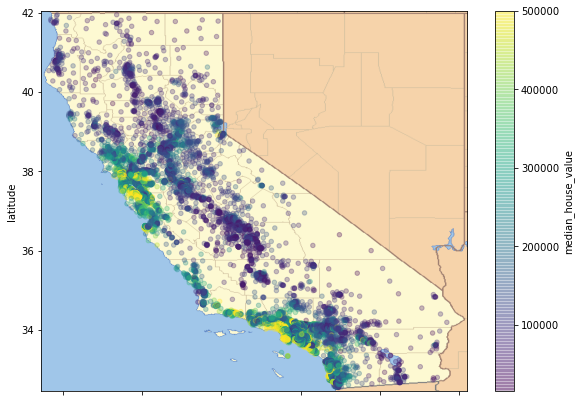

In [86]:
california = mpimg.imread('california.png')
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
    c="median_house_value", cmap='viridis',
    colorbar=True, figsize=(10,7))

#Fixe correctement l'image et superposer notre graphique.
plt.imshow(california, extent=[-124.55, -113.80, 32.45, 42.05], alpha=1)
plt.show()

(L'abscisse n'est pas affichée : Erreur d'affichage du notebook)

In [23]:
data.corrwith(data["median_house_value"])

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
dtype: float64

Une corrélation se fait si le coefficient de Pearson est proche de 1 (Corrélation positive) ou de -1 (Corrélation inverse). Dans notre cas, la Feature *Median_Income* est la seule en corrélation élevée avec notre Target *Median_House_Value*, les autres étant proches de 0.

### 1.5 Nettoyage des données

In [24]:
x = data.drop("median_house_value", axis=1)
y = data['median_house_value'].copy()

#### Nettoyage de *total_bedrooms*

In [25]:
data = data.fillna(data['total_bedrooms'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Nettoyage de *ocean_proximity*

In [26]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
data['ocean_proximity'] = encoder.fit_transform(data['ocean_proximity'])
data['ocean_proximity'].head(10)

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: ocean_proximity, dtype: int32

In [27]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


## 2. Sélection, apprentissage et évaluation du modèle

### Régression linéaire sur les données d’apprentissage

In [29]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [147]:
x = data.drop("median_house_value", axis=1)
y = data['median_house_value'].copy()

x_app, x_test, y_app, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [148]:
modelreg = LinearRegression()
modelreg.fit(x_app, y_app)

#Prédiction sur l’échantillon test
y_app_pred = modelreg.predict(x_app)

In [149]:
print("RMSE du modèle de régression linéaire : \t", mean_squared_error(y_app, y_app_pred, squared=False))

RMSE du modèle de régression linéaire : 	 69618.59441427025


In [150]:
print("Score du modèle de régression linéaire : \t", modelreg.score(x_test, y_test))

Score du modèle de régression linéaire : 	 0.6259751339619383


#### Cross Validation

In [152]:
scores_linreg = cross_val_score(modelreg, x_app, y_app, scoring="neg_mean_squared_error", cv=10)
print("Negative MSE :")
scores_linreg

Negative MSE :


array([-5.21809264e+09, -4.50193554e+09, -5.02642421e+09, -4.64033316e+09,
       -5.45601214e+09, -4.82815415e+09, -4.61133166e+09, -4.64706461e+09,
       -5.40062126e+09, -4.42987246e+09])

In [158]:
rmse_scores_linreg = np.sqrt(-scores_linreg)
print("RMSE de chaque fold :")
rmse_scores_linreg

RMSE de chaque fold :


array([72236.36646842, 67096.46447375, 70897.27929813, 68119.99088708,
       73864.82344076, 69484.92033469, 67906.78655674, 68169.38179617,
       73488.91932624, 66557.28708213])

In [159]:
print("RMSE Moyenne de notre validation croisée : \t", rmse_scores_linreg.mean(), "\nSTD :\t \t \t \t \t \t", rmse_scores_linreg.std())

RMSE Moyenne de notre validation croisée : 	 69782.22196641093 
STD :	 	 	 	 	 	 2534.893061544951


###  Decision Tree Regressor

In [153]:
modeltreereg = DecisionTreeRegressor()
modeltreereg.fit(x_app, y_app)

#Prédiction sur l’échantillon test
y_pred = modeltreereg.predict(x_app)

In [154]:
print("RMSE :\t", mean_squared_error(y_app, y_pred, squared=False))

RMSE :	 0.0


In [155]:
print("Score du modèle de Decision Tree Regressor : \t", modeltreereg.score(x_test, y_test))

Score du modèle de Decision Tree Regressor : 	 0.6508198636307195


#### Cross Validation

In [156]:
scores_treereg = cross_val_score(modeltreereg, x_app, y_app, scoring="neg_mean_squared_error", cv=10)
print("Negative MSE : ")
scores_treereg

Negative MSE : 


array([-5.21751817e+09, -4.75143615e+09, -4.78334041e+09, -4.29982099e+09,
       -5.75153292e+09, -4.82113194e+09, -4.30426643e+09, -4.95817641e+09,
       -4.66774137e+09, -4.57986057e+09])

In [157]:
rmse_scores_treereg = np.sqrt(-scores_treereg)
print("RMSE de chaque fold :")
rmse_scores_treereg

RMSE de chaque fold :


array([72232.39001554, 68930.6619304 , 69161.69753713, 65573.02026531,
       75838.86151551, 69434.37143322, 65606.9083817 , 70414.31963381,
       68320.87066235, 67674.66711961])

In [160]:
print("RMSE Moyenne de notre validation croisée : \t", rmse_scores_treereg.mean(), "\nSTD :\t \t \t \t \t \t", rmse_scores_treereg.std())

RMSE Moyenne de notre validation croisée : 	 69318.77684945732 
STD :	 	 	 	 	 	 2896.4996531429247


La moyenne des RMSE du modèle Régression Linéaire est globalement similaire à la RMSE du modèle de Decision Tree Regressor. La variance de Decision Tree Regressor est quant à elle supérieure à notre modèle de Régression Linéaire (2892 contre 2534), il y a donc une plus grande dispersion de nos scores de cross validation pour le modèle de Decision Tree Regressor. En comparant les résultats d'autres personnes, il peut y avoir des différences où l'un des modèles semble plus performant que l'autre. Cela peut être du à notre test_train_split qui répartit nos données d'apprentissage de manière aléatoire. 

## 3. Fine-Tunning

### 3.1 Grid Search

#### Préparation

In [110]:
forestreg = RandomForestRegressor()
forestreg.fit(x_app, y_app)

RandomForestRegressor()

In [111]:
#Incorporation des paramètres
param_grid = {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}
param_grid

{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}

In [131]:
#Recherche validation croisée de type 5-fold
grid_search = GridSearchCV(forestreg, param_grid, cv=5)
grid_search

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]})

#### fonction best_params_

In [133]:
grid_search.fit(x_app, y_app)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]})

In [134]:
#Affiche les meilleurs paramètres de la méthode RandomForestRegressor
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [135]:
combinaison = grid_search.cv_results_

In [137]:
#Résultats des 12 combinaisons
for parameter in combinaison["params"]:
    print(parameter)

{'max_features': 2, 'n_estimators': 3}
{'max_features': 2, 'n_estimators': 10}
{'max_features': 2, 'n_estimators': 30}
{'max_features': 4, 'n_estimators': 3}
{'max_features': 4, 'n_estimators': 10}
{'max_features': 4, 'n_estimators': 30}
{'max_features': 6, 'n_estimators': 3}
{'max_features': 6, 'n_estimators': 10}
{'max_features': 6, 'n_estimators': 30}
{'max_features': 8, 'n_estimators': 3}
{'max_features': 8, 'n_estimators': 10}
{'max_features': 8, 'n_estimators': 30}


#### Evaluation sur la base de test

In [138]:
#On s'assure que les x et y n'ont pas été écrasé.
x = data.drop("median_house_value", axis=1)
y = data['median_house_value'].copy()

x_app, x_test, y_app, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [139]:
#Grid search sur notre dernier modèle
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_features=6, n_estimators=30)

In [140]:
y_pred = best_model.predict(x_test)

In [141]:
final_mse = mean_squared_error(y_test, y_pred)

In [142]:
final_rmse = np.sqrt(final_mse)
print("RMSE :\t ", final_rmse)

RMSE :	  48394.28028772813


In [143]:
print("Score du modèle de Random Forest Regressor : \t", best_model.score(x_test, y_test))

Score du modèle de Random Forest Regressor : 	 0.8203920733447401


Notre meilleur modèle a une RMSE de 48664, nettement plus performant que nos précédents modèles possèdant une RMSE avoisinnant les 70000. Au niveau du score du modèle, elle avoisine les 82% de performance contre 65% pour les deux précédents modèles.